In [1]:
import sys
import os
sys.path.append(os.getcwd() + "\\..\\")

In [10]:
import model
import neural
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from typing import Callable, List, Any
%matplotlib inline

In [14]:
def make_dynamic_model(states):
    return model.LotkaVoltera(2/3, 4/3, 1, 1, states)

#Формируем модель и список начальных состояний
num_states = 50 #число начальных состояний
t_start = 0
t_stop = 10
value = np.around(np.linspace(0.05, 1, num_states), 3)
state = []
for i in value:
    for j in value:
        if i > j and i != 0:
            state.append((i, j))
state_train = state[0::2]
state_test = state[1::2]

m_train = make_dynamic_model(state_train)
m_test = make_dynamic_model(state_test)
#t = np.arange(t_start, t_stop, 0.1)
t = np.linspace(t_start, t_stop, 50)

#Формируем обучающую выборку
(X, Y) = model.make_train_of_model(m_train, t)
x_max = np.max(X, axis=0);
y_max = np.max(Y,  axis=0);
X = X/x_max
Y = Y/x_max
X.shape

#Формируем тестовую выборку
(X_test, Y_test) =model. make_train_of_model(m_test, t)
X_test = X_test/np.max(X_test, axis=0)
Y_test =  Y_test/np.max( Y_test,  axis=0)

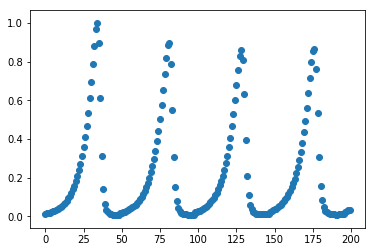

In [4]:
max_t = 200
plt.scatter([i for i in range(max_t)], X[0:max_t, 0])

In [5]:
def update_lr(epoche, lr):
    if epoche % 5 == 0:
        return lr*0.9
    return lr

In [6]:
ann = neural.ResNet((2,), 2, 64, 3, 2, keras.layers.LeakyReLU(), None)
ann = keras.Model(inputs=ann.inputs, outputs=ann.outputs)
lr_changer =  tf.keras.callbacks.LearningRateScheduler(update_lr, 1)
ann.compile(keras.optimizers.Adam(), loss="mse", metrics=['mae',neural.RelativeApproximationError()])
ann.summary()

W0130 21:37:43.045808  6452 deprecation.py:506] From c:\program files\python37\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 64)           192         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 64)           4160        dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           4160        dense_1[0][0]                    
______________________________________________________________________________________________

In [7]:
h =ann.fit(X, Y, batch_size=32, epochs=100, 
             validation_data = [X_test, Y_test],  callbacks=[lr_changer])

Train on 30037 samples, validate on 29988 samples

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0009000000427477062.
Epoch 1/100
30037/30037 [==============================] - 1s 42us/sample - loss: 1.3015e-04 - mean_absolute_error: 0.0031 - RAE: 2.2783 - val_loss: 4.0746e-06 - val_mean_absolute_error: 0.0014 - val_RAE: 1.5705

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0009000000427477062.
Epoch 2/100
30037/30037 [==============================] - 1s 37us/sample - loss: 4.1431e-06 - mean_absolute_error: 0.0011 - RAE: 1.3134 - val_loss: 5.5616e-06 - val_mean_absolute_error: 0.0016 - val_RAE: 1.1499

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0009000000427477062.
Epoch 3/100
30037/30037 [==============================] - 1s 37us/sample - loss: 4.5202e-06 - mean_absolute_error: 0.0013 - RAE: 1.0961 - val_loss: 4.9272e-06 - val_mean_absolute_error: 0.0016 - val_RAE: 1.0512

Epoch 00004: LearningRateScheduler reducing learning rate 

30037/30037 [==============================] - 1s 36us/sample - loss: 1.0472e-06 - mean_absolute_error: 6.2403e-04 - RAE: 0.8582 - val_loss: 6.4822e-06 - val_mean_absolute_error: 0.0020 - val_RAE: 0.8597

Epoch 00029: LearningRateScheduler reducing learning rate to 0.0005314410664141178.
Epoch 29/100
30037/30037 [==============================] - 1s 37us/sample - loss: 7.6613e-07 - mean_absolute_error: 5.4433e-04 - RAE: 0.8514 - val_loss: 5.4948e-06 - val_mean_absolute_error: 0.0015 - val_RAE: 0.8467

Epoch 00030: LearningRateScheduler reducing learning rate to 0.0005314410664141178.
Epoch 30/100
30037/30037 [==============================] - 1s 37us/sample - loss: 5.2788e-07 - mean_absolute_error: 4.9979e-04 - RAE: 0.8386 - val_loss: 6.2574e-06 - val_mean_absolute_error: 0.0017 - val_RAE: 0.8361

Epoch 00031: LearningRateScheduler reducing learning rate to 0.00047829695977270604.
Epoch 31/100
30037/30037 [==============================] - 1s 37us/sample - loss: 4.9889e-07 - mean_absol

30037/30037 [==============================] - 1s 37us/sample - loss: 6.1952e-08 - mean_absolute_error: 1.7010e-04 - RAE: 0.5989 - val_loss: 5.6397e-06 - val_mean_absolute_error: 0.0017 - val_RAE: 0.5993

Epoch 00083: LearningRateScheduler reducing learning rate to 0.00016677183157298714.
Epoch 83/100
30037/30037 [==============================] - 1s 38us/sample - loss: 8.2204e-08 - mean_absolute_error: 1.8186e-04 - RAE: 0.5965 - val_loss: 6.7197e-06 - val_mean_absolute_error: 0.0019 - val_RAE: 0.5977

Epoch 00084: LearningRateScheduler reducing learning rate to 0.00016677183157298714.
Epoch 84/100
30037/30037 [==============================] - 1s 38us/sample - loss: 4.7930e-08 - mean_absolute_error: 1.5442e-04 - RAE: 0.5948 - val_loss: 5.9183e-06 - val_mean_absolute_error: 0.0017 - val_RAE: 0.5952

Epoch 00085: LearningRateScheduler reducing learning rate to 0.00016677183157298714.
Epoch 85/100
30037/30037 [==============================] - 1s 38us/sample - loss: 4.6960e-08 - mean_abs

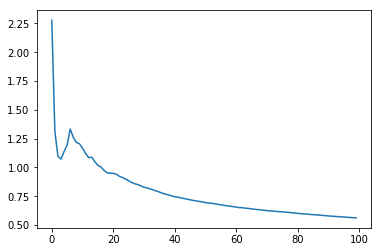

In [8]:
key = "RAE"
plt.plot([i for i in range(len(h.history[key]))], h.history[key])

In [23]:
begin = [0.5, 0.2]
mbegin =np.array([begin]) / x_max;
predict = [np.array(mbegin)]
time = 50
for i in range(time-1):
    predict.append(ann.predict(predict[-1]))
predict = np.stack(predict).reshape(-1, 2)

In [24]:
lv_model = make_dynamic_model([])

In [25]:
time_sequence = np.linspace(0, t_stop, time)
model_solve = integrate.odeint(lv_model, begin , time_sequence)
model_solve = model_solve/x_max

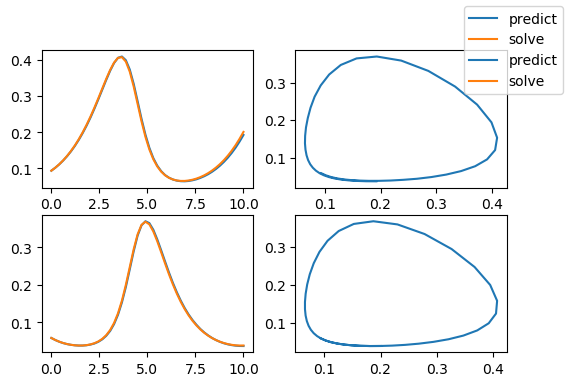

In [29]:
var = 0
fig, ax = plt.subplots(2, 2, dpi=100)
ax[0, 0].plot(time_sequence, predict[:, 0], label="predict")
ax[0, 0].plot(time_sequence, model_solve[:, 0], label="solve")
ax[1, 0].plot(time_sequence, predict[:, 1], label="predict")
ax[1, 0].plot(time_sequence, model_solve[:, 1], label="solve")
ax[0, 1].plot(predict[:, 0], predict[:, 1])
ax[1, 1].plot(model_solve[:, 0], model_solve[:, 1])
fig.legend()

In [60]:
plt.plot()

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [13]:
ann.load_weights("./weights.chpt")

# Тестирование модели

In [63]:
def model_predict(m, start, norm_value,  steps):
    """Приминение модели для получения предстказания траектории"""
    mbegin =np.array([start]) / norm_value;
    predict = [np.array(mbegin)]
    for i in range(steps-1):
        predict.append(m.predict(predict[-1]))
    return np.stack(predict).reshape(-1, 2)

def make_plots(predict_data, model_data):
    """Формирование графиков на основе данных"""
    if len(predict_data) != len(model_data):
        raise RuntimeError("lenthg of predict_data and model_data must be equal")
    time_sequence = [i for i in range(len(predict_data))]
    fig, ax = plt.subplots(2, 3, dpi=200, figsize=(30, 10))
    
    ax[0, 0].set_title("Хищиники")
    ax[0, 0].scatter(time_sequence, predict_data[:, 0], label="predict")
    ax[0, 0].scatter(time_sequence, model_data[:, 0], label="solve")
    
    ax[1, 0].set_title("жертвы")
    ax[1, 0].scatter(time_sequence, predict_data[:, 1], label="predict")
    ax[1, 0].scatter(time_sequence, model_data[:, 1], label="solve")
    
    ax[0, 1].set_title("Фазовый портрет аппроксимации")
    ax[0, 1].scatter(predict_data[:, 0], predict_data[:, 1])
    
    ax[0, 1].set_title("Фазовый портрет модели")
    ax[1, 1].scatter(model_data[:, 0], model_data[:, 1])
    
    ax[0, 2].set_title("Ошибка аппроксимации хищников")
    ax[0, 2].scatter(time_sequence, predict_data[:, 0] - model_data[:, 0])
    
    ax[1, 2].set_title("Ошибка аппроксимации жертв")
    ax[1, 2].scatter(time_sequence, predict_data[:, 1] - model_data[:, 1])
    fig.legend()
    
def model_predict_test(ann_model : neural.Ann,
                       analitic_model : Callable[[List[Any], List[float]], List[float]],
                       start : List[int],
                       norm_value : float,
                       steps : int,
                       time_end : float):
    predict = model_predict(ann_model, start, norm_value,  steps)
    time_sequence = np.linspace(0, time_end, steps)
    solve = integrate.odeint(analitic_model, start , time_sequence)
    solve = solve/norm_value
    make_plots(predict, solve)

model_phase_test()

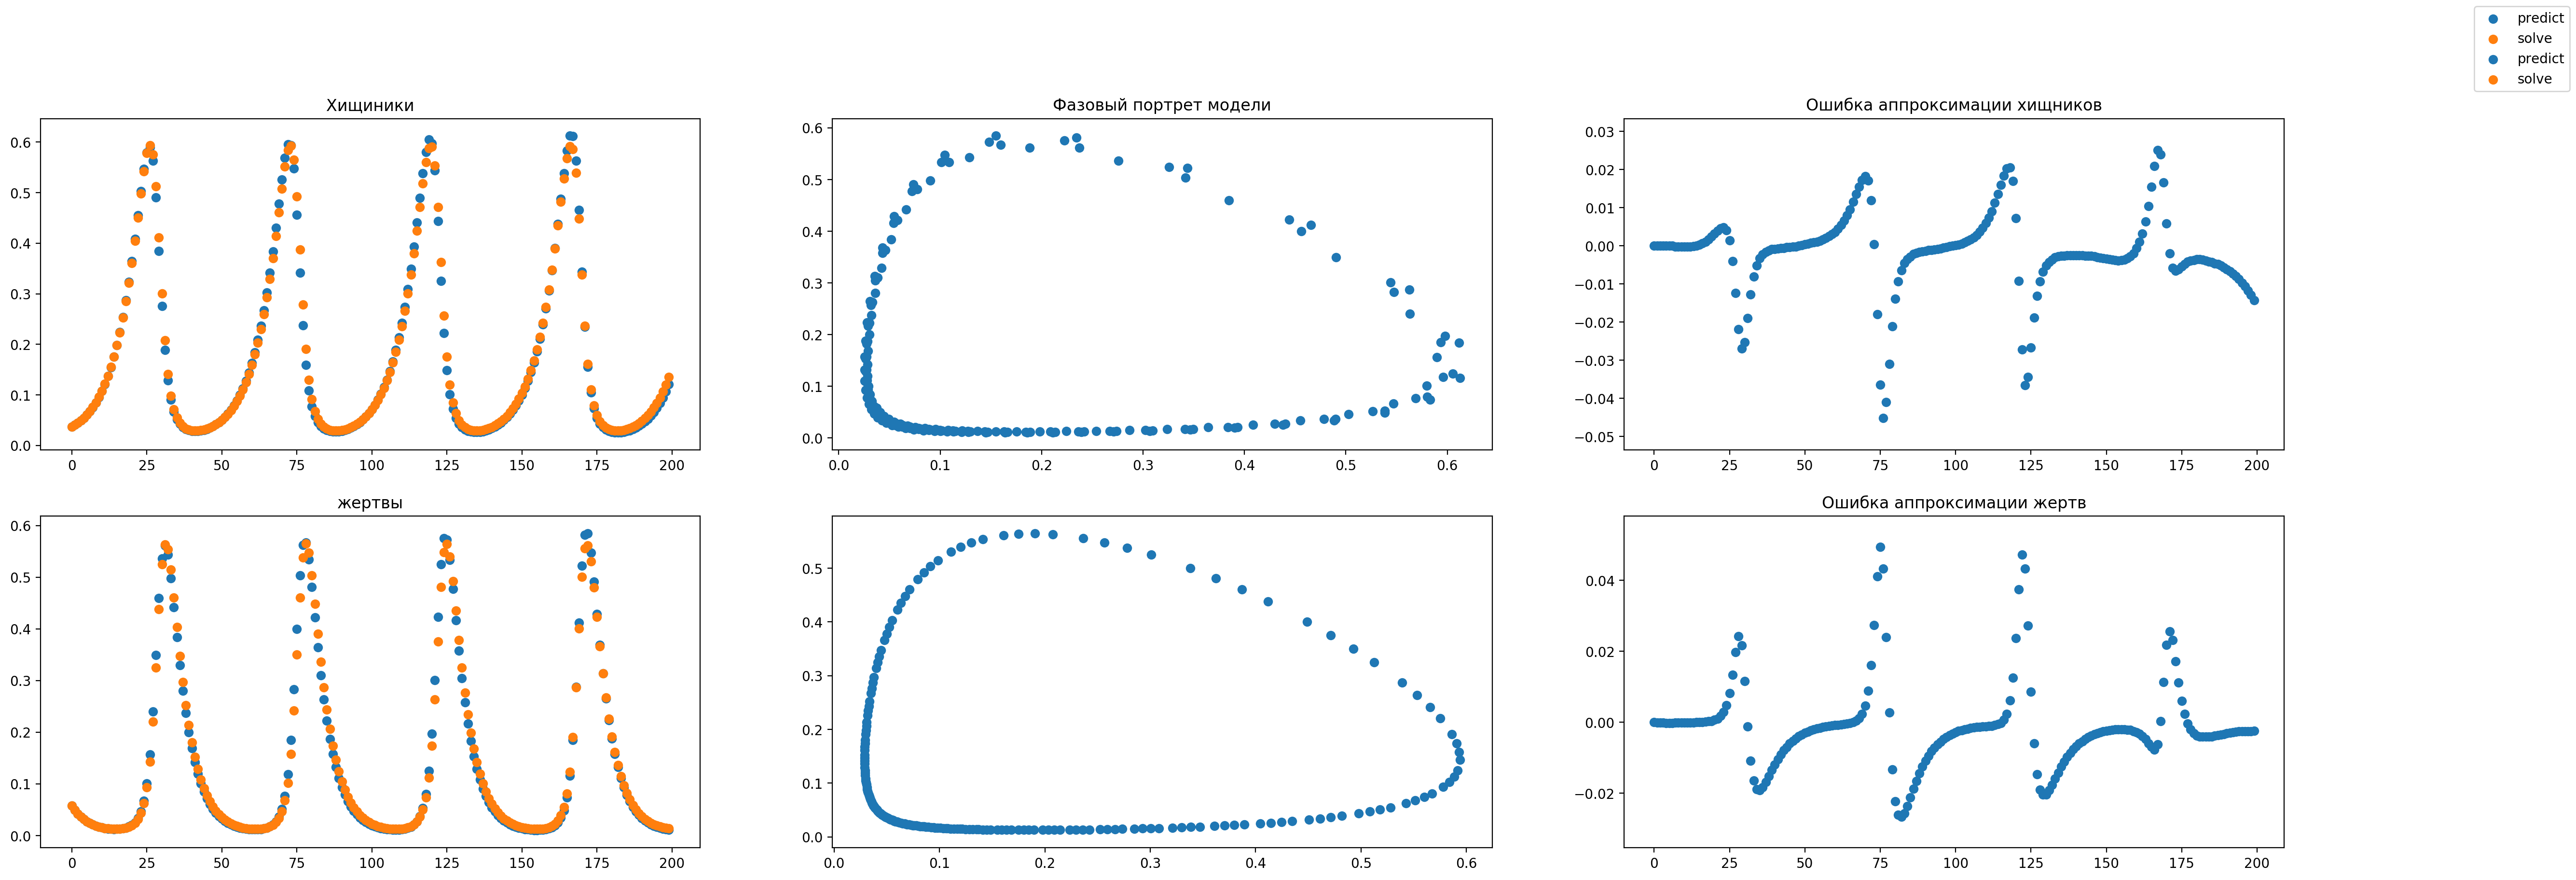

In [64]:
model_predict_test(ann, m_train, [0.2, 0.2], x_max, 200, 40)

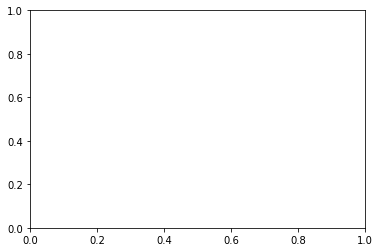

In [35]:
fig, ax = plt.subplots(1, 1)

In [40]:
p = ax.plot
p([1, 2], [1, 4])

In [41]:
ax